In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# Set a Seaborn style for attractive plots
sns.set(style="whitegrid")
dark_palette = [  '#008B8B', '#556B2F',]
dark_palette2 = ['#00DCD9', '#0F9EA5', '#0E9888', '#1379B2', '#0E53B5']

# Load dataset
data = pd.read_csv('IBMEmployee_data.csv')

def combined_function():
    # --------- Model 1 ---------
    def model1():
        y = data['PerformanceRating']
        
        # Convert PerformanceRating to binary classes
        le = LabelEncoder() 
        y = le.fit_transform(y)
        
        # Feature columns
        features = ['TotalWorkingYears', 'YearsInCurrentRole', 'JobLevel', 'JobInvolvement', 'TrainingTimesLastYear', 'JobSatisfaction']
        x = data[features]
        
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
        
        xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
        xgb_clf.fit(x_train, y_train)
        y_pred = xgb_clf.predict(x_test)

        # Plot feature importances and save
        plt.figure(figsize=(8, 6)) 
        xgb.plot_importance(xgb_clf, importance_type='weight', max_num_features=10) 
        plt.title('Feature Importances for Model 1')
        plt.set_cmap('coolwarm')  # Set a colorful colormap for the feature importance plot
        
        # Save the plot
        plt.savefig('feature_importance_model1.png', bbox_inches='tight')
        plt.show()

    # --------- Chart 1 ---------
    def chart_1():
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='PerformanceRating', y='TotalWorkingYears', data=data, palette=dark_palette)
        plt.title('Total Working Years by Performance Rating')
        plt.xlabel('Performance Rating')
        plt.ylabel('Total Working Years')
        plt.grid()
        
        # Save the plot
        plt.savefig('chart_total_working_years_by_performance_rating.png')
        plt.show()

    # --------- Chart 2 ---------
    def chart_2():
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='JobLevel', y='TotalWorkingYears', data=data, palette=dark_palette2)
        plt.title('Job Level by Performance Rating')
        plt.xlabel('Job Level')
        plt.ylabel('Performance Rating')
        plt.grid()
        
        # Save the plot
        plt.savefig('chart_job_level_by_performance_rating.png')
        plt.show()

    # --------- Model 2 ---------
    def model_2():
        x = data.drop(columns=['YearsSinceLastPromotion'])
        y = data['YearsSinceLastPromotion']
        
        categorical_columns = ['BusinessTravel', 'Department', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
        ordinal_columns = ['Education', 'EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']
        
        x = pd.get_dummies(x, columns=categorical_columns, drop_first=True)
        
        le = LabelEncoder()
        for col in ordinal_columns:
            x[col] = le.fit_transform(x[col])
        x['Attrition'] = le.fit_transform(x['Attrition'])
        
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
        
        train_data = lgb.Dataset(x_train, label=y_train)
        test_data = lgb.Dataset(x_test, label=y_test, reference=train_data)
        
        params = {
            'objective': 'regression',
            'metric': 'rmse',
            'boosting_type': 'gbdt',
            'num_leaves': 31,
            'learning_rate': 0.05,
            'feature_fraction': 0.9
        }
        
        early_stopping_callback = lgb.early_stopping(stopping_rounds=100)
        model = lgb.train(params, train_data, valid_sets=[test_data], num_boost_round=1000, callbacks=[early_stopping_callback])
        
        y_pred = model.predict(x_test, num_iteration=model.best_iteration)

        # Plot feature importance and save
        plt.figure(figsize=(8, 6))
        lgb.plot_importance(model, max_num_features=10, color='purple')  # Custom color for LGBM plot
        plt.title("Feature Importance for Model 2")
        
        # Save the plot
        # plt.savefig('feature_importance_model2.png')
        plt.savefig('feature_importance_model2.png', bbox_inches='tight')

        plt.show()

    # --------- Chart 3 ---------
    def chart_3():
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='YearsAtCompany', y='YearsSinceLastPromotion', data=data, palette='coolwarm')
        plt.title('Years At Company by Years Since Last Promotion')
        plt.xlabel('Years At Company')
        plt.ylabel('Years Since Last Promotion')
        plt.grid()
        
        # Save the plot
        plt.savefig('chart_years_at_company_by_years_since_last_promotion.png')
        plt.show()

    # --------- Chart 4 ---------
    def chart_4():
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='Education', y='YearsSinceLastPromotion', data=data, palette='Spectral')
        plt.title('Education by Years Since Last Promotion')
        plt.xlabel('Education')
        plt.ylabel('Years Since Last Promotion')
        plt.grid()
        
        # Save the plot
        plt.savefig('chart_education_by_years_since_last_promotion.png')
        plt.show()

    # Call all methods in sequence
    model1()
    chart_1()
    chart_2()
    model_2()
    chart_3()
    chart_4()

# Call the combined function to execute all steps
combined_function()


<Figure size 800x600 with 0 Axes>

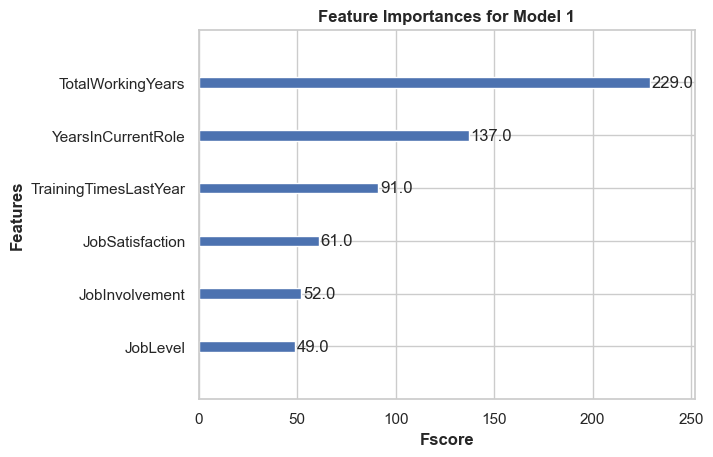

C:\Users\KISHAN\AppData\Local\Temp\ipykernel_8368\836088036.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='WorkingYearsRange', y='PerformanceRating', data=data, palette='coolwarm')


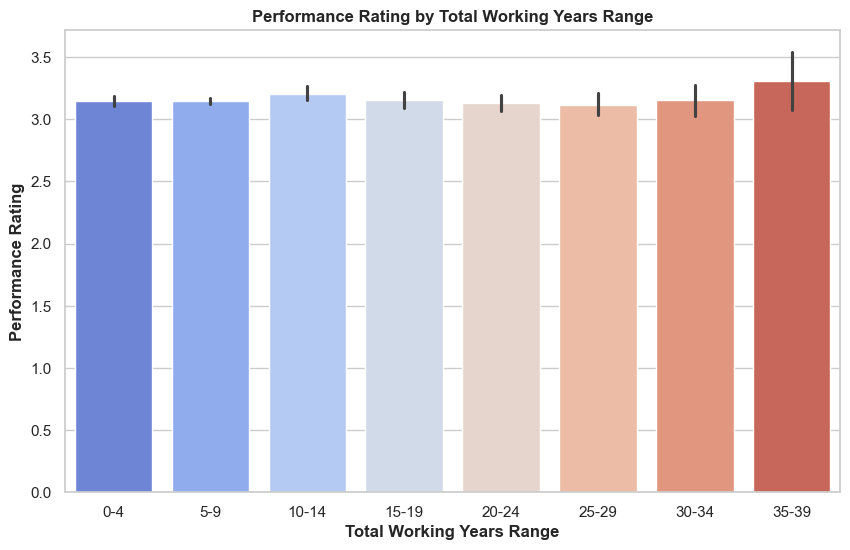

C:\Users\KISHAN\AppData\Local\Temp\ipykernel_8368\836088036.py:72: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='JobLevel', y='PerformanceRating', data=data, palette='dark_palette2', alpha=0.7)
C:\Users\KISHAN\AppData\Local\Temp\ipykernel_8368\836088036.py:77: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  plt.grid(False, which='both', linestyle='--', linewidth=0.5, alpha=0.7)


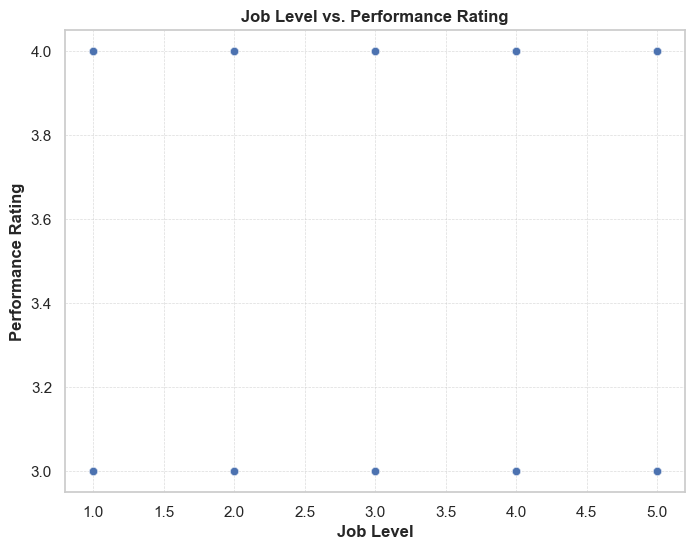

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002992 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 546
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 37
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 2.107143
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[53]	valid_0's rmse: 2.69811


<Figure size 800x600 with 0 Axes>

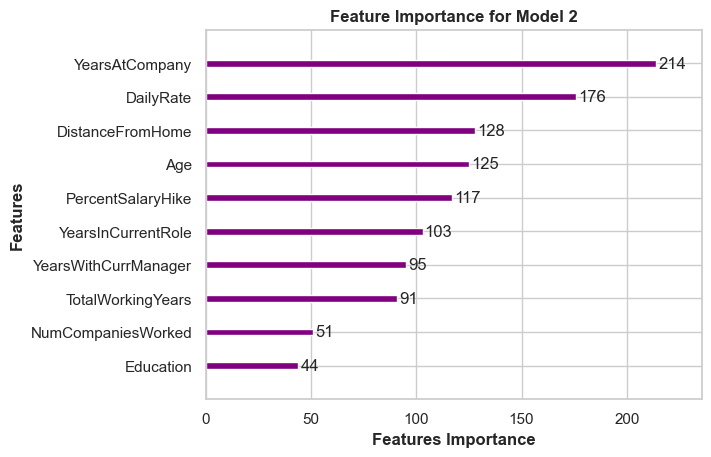

C:\Users\KISHAN\AppData\Local\Temp\ipykernel_8368\836088036.py:140: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='YearsAtCompany_Binned', y='YearsSinceLastPromotion', data=data, palette='coolwarm', ci=None)
C:\Users\KISHAN\AppData\Local\Temp\ipykernel_8368\836088036.py:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='YearsAtCompany_Binned', y='YearsSinceLastPromotion', data=data, palette='coolwarm', ci=None)
C:\Users\KISHAN\AppData\Local\Temp\ipykernel_8368\836088036.py:145: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  plt.grid(False, which='both', linestyle='--', linewidth=0.5, alpha=0.7)


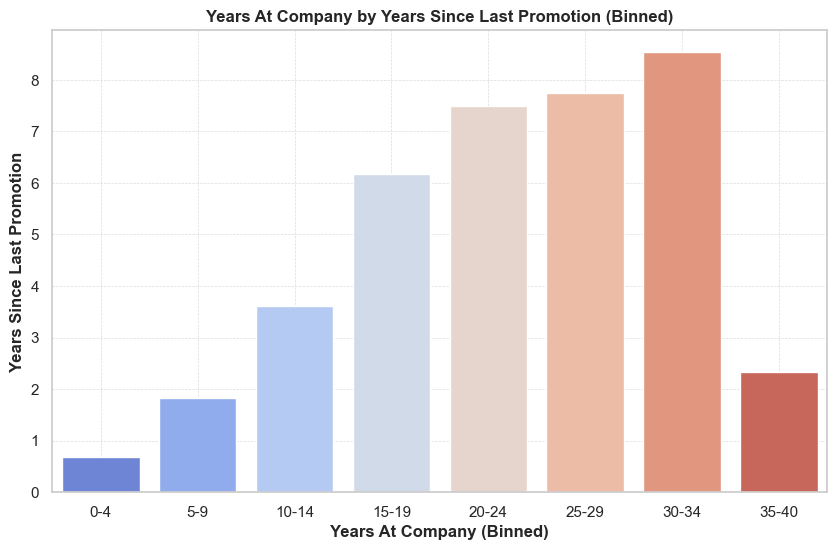

C:\Users\KISHAN\AppData\Local\Temp\ipykernel_8368\836088036.py:155: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Education', y='YearsSinceLastPromotion', data=data, palette='dark_palette3', alpha=0.7)
C:\Users\KISHAN\AppData\Local\Temp\ipykernel_8368\836088036.py:160: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  plt.grid(False, which='both', linestyle='--', linewidth=0.5, alpha=0.7)


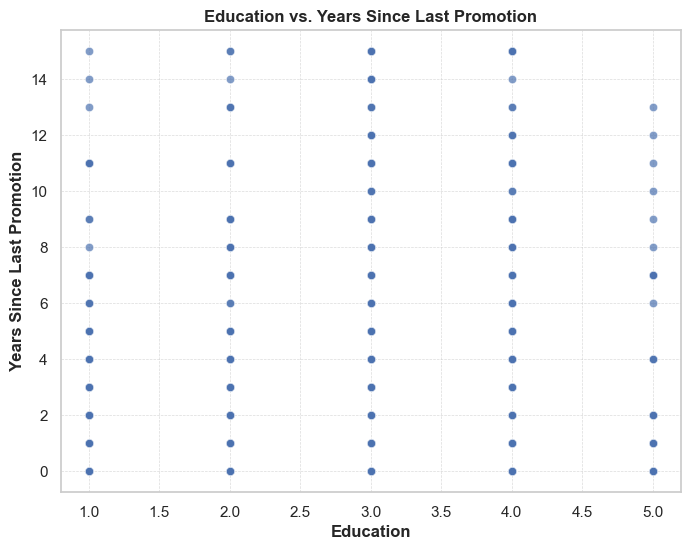

C:\Users\KISHAN\AppData\Local\Temp\ipykernel_8368\836088036.py:170: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='JobSatisfaction', data=data, palette='coolwarm')


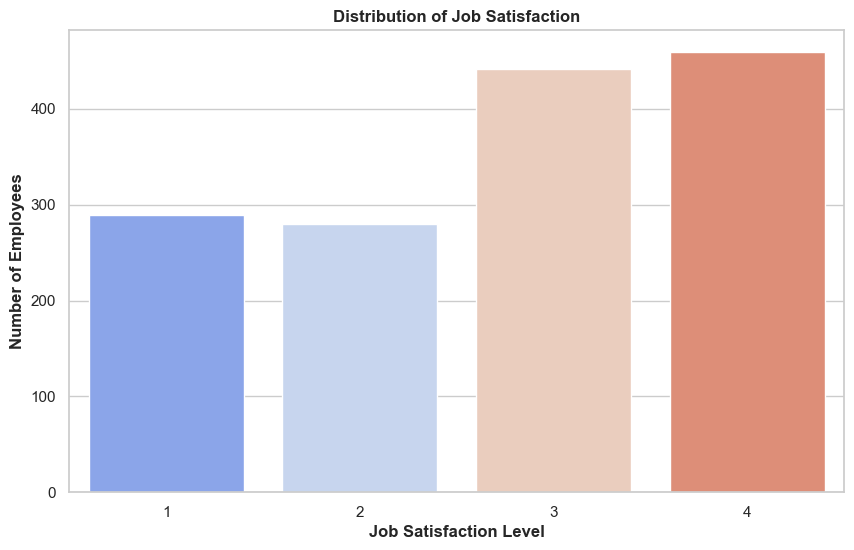

C:\Users\KISHAN\AppData\Local\Temp\ipykernel_8368\836088036.py:186: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='JobInvolvement', data=data, palette=dark_palette2)
C:\Users\KISHAN\AppData\Local\Temp\ipykernel_8368\836088036.py:186: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.countplot(x='JobInvolvement', data=data, palette=dark_palette2)


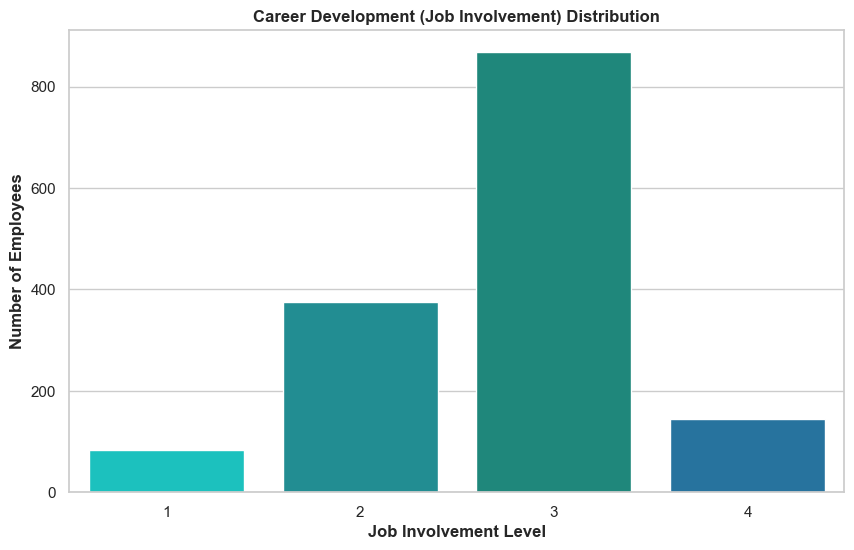

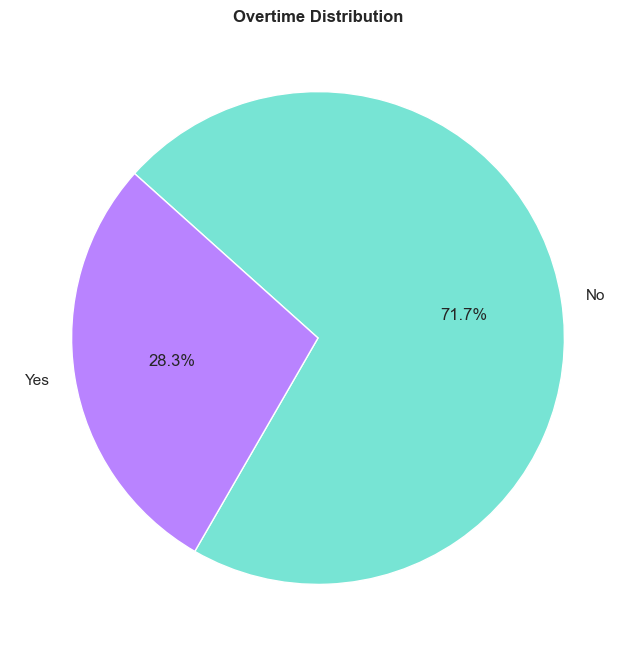

In [55]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# Set a Seaborn style for attractive plots
sns.set(style="whitegrid")
dark_palette = ['#008B8B', '#556B2F',]
dark_palette2 = ['#00DCD9', '#0F9EA5', '#0E9888', '#1379B2', '#0E53B5']
dark_palette3 = ['#21D375', '#6BBF59', '#08A045', '#0B6E4F', '#073B3A']
dark_palette4 = ['#77E4D4', '#B983FF']

# Load dataset
data = pd.read_csv('IBMEmployee_data.csv')

def combined_function():
    # --------- Model 1 ---------
    def model1():
        y = data['PerformanceRating']
        
        # Convert PerformanceRating to binary classes
        le = LabelEncoder() 
        y = le.fit_transform(y)
        
        # Feature columns
        features = ['TotalWorkingYears', 'YearsInCurrentRole', 'JobLevel', 'JobInvolvement', 'TrainingTimesLastYear', 'JobSatisfaction']
        x = data[features]
        
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
        
        xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
        xgb_clf.fit(x_train, y_train)
        y_pred = xgb_clf.predict(x_test)

        # Plot feature importances and save
        plt.figure(figsize=(8, 6))
        xgb.plot_importance(xgb_clf, importance_type='weight', max_num_features=10) 
        plt.title('Feature Importances for Model 1', fontweight='bold')
        plt.xlabel('Fscore',fontweight='bold')
        plt.ylabel('Features',fontweight='bold')
        plt.set_cmap('coolwarm')  # Set a colorful colormap for the feature importance plot
        
        # Save the plot
        plt.savefig(r'C:\Users\KISHAN\Desktop\Group project\Groupproject\StaffSphere---Employee-Management-System\react-side\public\feature_importance_model1.png', bbox_inches='tight')
        plt.show()

    # --------- Chart 1 ---------
    def chart_1():
        bins = range(0, 45, 5)  # Create bins of size 5 from 0 to 40
        labels = [f'{i}-{i+4}' for i in bins[:-1]]
        data['WorkingYearsRange'] = pd.cut(data['TotalWorkingYears'], bins=bins, labels=labels, include_lowest=True)
        
        # Create the bar plot
        plt.figure(figsize=(10, 6))
        sns.barplot(x='WorkingYearsRange', y='PerformanceRating', data=data, palette='coolwarm')
        plt.title('Performance Rating by Total Working Years Range', fontweight='bold')
        plt.xlabel('Total Working Years Range',fontweight='bold')
        plt.ylabel('Performance Rating',fontweight='bold')
        # plt.grid(True)
        
        # Save the plot
        plt.savefig(r'C:\Users\KISHAN\Desktop\Group project\Groupproject\StaffSphere---Employee-Management-System\react-side\public\barplot_performance_rating_by_working_years_range.png')
        plt.show()

    def chart_2():
        plt.figure(figsize=(8, 6))

        # Create a scatter plot
        sns.scatterplot(x='JobLevel', y='PerformanceRating', data=data, palette='dark_palette2', alpha=0.7)

        plt.title('Job Level vs. Performance Rating', fontweight='bold')
        plt.xlabel('Job Level', fontweight='bold')
        plt.ylabel('Performance Rating', fontweight='bold')
        plt.grid(False, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

        # Save the plot
        plt.savefig(r'C:\Users\KISHAN\Desktop\Group project\Groupproject\StaffSphere---Employee-Management-System\react-side\public\chart_job_level_vs_performance_rating_scatter.png')
        plt.show()

    # --------- Model 2 ---------
    def model_2():
        x = data.drop(columns=['YearsSinceLastPromotion'])
        y = data['YearsSinceLastPromotion']
        
        categorical_columns = ['BusinessTravel', 'Department', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
        ordinal_columns = ['Education', 'EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']
        
        x = pd.get_dummies(x, columns=categorical_columns, drop_first=True)
        
        le = LabelEncoder()
        for col in ordinal_columns:
            x[col] = le.fit_transform(x[col])
        x['Attrition'] = le.fit_transform(x['Attrition'])
        
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
        
        train_data = lgb.Dataset(x_train, label=y_train)
        test_data = lgb.Dataset(x_test, label=y_test, reference=train_data)
        
        params = {
            'objective': 'regression',
            'metric': 'rmse',
            'boosting_type': 'gbdt',
            'num_leaves': 31,
            'learning_rate': 0.05,
            'feature_fraction': 0.9
        }
        
        early_stopping_callback = lgb.early_stopping(stopping_rounds=100)
        model = lgb.train(params, train_data, valid_sets=[test_data], num_boost_round=1000, callbacks=[early_stopping_callback])
        
        y_pred = model.predict(x_test, num_iteration=model.best_iteration)

        # Plot feature importance and save
        plt.figure(figsize=(8, 6))
        lgb.plot_importance(model, max_num_features=10, color='purple')  # Custom color for LGBM plot
        plt.title("Feature Importance for Model 2", fontweight='bold')
        plt.xlabel('Features Importance',fontweight='bold')
        plt.ylabel('Features',fontweight='bold')
        
        # Save the plot
        plt.savefig(r'C:\Users\KISHAN\Desktop\Group project\Groupproject\StaffSphere---Employee-Management-System\react-side\public\feature_importance_model2.png', bbox_inches='tight')

        plt.show()

    def chart_3():
        plt.figure(figsize=(10, 6))
        
        # Define bins for the range of 5 years
        bins = range(0, 45, 5)
        labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-40']
        
        # Create a new column for the binned 'YearsAtCompany'
        data['YearsAtCompany_Binned'] = pd.cut(data['YearsAtCompany'], bins=bins, labels=labels, right=False)
        
        # Create a bar plot using the binned data
        sns.barplot(x='YearsAtCompany_Binned', y='YearsSinceLastPromotion', data=data, palette='coolwarm', ci=None)
        
        plt.title('Years At Company by Years Since Last Promotion (Binned)', fontweight='bold')
        plt.xlabel('Years At Company (Binned)', fontweight='bold')
        plt.ylabel('Years Since Last Promotion', fontweight='bold')
        plt.grid(False, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
        
        # Save the plot
        plt.savefig(r'C:\Users\KISHAN\Desktop\Group project\Groupproject\StaffSphere---Employee-Management-System\react-side\public\chart_years_at_company_binned_by_years_since_last_promotion_bar.png')
        plt.show()

    def chart_4():
        plt.figure(figsize=(8, 6))

        # Create a scatter plot
        sns.scatterplot(x='Education', y='YearsSinceLastPromotion', data=data, palette='dark_palette3', alpha=0.7)

        plt.title('Education vs. Years Since Last Promotion', fontweight='bold')
        plt.xlabel('Education', fontweight='bold')
        plt.ylabel('Years Since Last Promotion', fontweight='bold')
        plt.grid(False, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

        # Save the plot
        plt.savefig(r'C:\Users\KISHAN\Desktop\Group project\Groupproject\StaffSphere---Employee-Management-System\react-side\public\chart_education_vs_years_since_last_promotion_scatter.png')
        plt.show()

    def chart_5():
        plt.figure(figsize=(10, 6))
        
        # Create a count plot for Job Satisfaction
        sns.countplot(x='JobSatisfaction', data=data, palette='coolwarm')
        
        plt.title('Distribution of Job Satisfaction', fontweight='bold')
        plt.xlabel('Job Satisfaction Level', fontweight='bold')
        plt.ylabel('Number of Employees', fontweight='bold')
        # plt.grid(True)
        
        # Save the plot
        plt.savefig(r'C:\Users\KISHAN\Desktop\Group project\Groupproject\StaffSphere---Employee-Management-System\react-side\public\chart_job_satisfaction_distribution.png', bbox_inches='tight')
        plt.show()

    # --------- New Chart 6: Career Development ---------
    def chart_6():
        plt.figure(figsize=(10, 6))
        
        # Create a count plot for Career Development
        sns.countplot(x='JobInvolvement', data=data, palette=dark_palette2)
        
        plt.title('Career Development (Job Involvement) Distribution', fontweight='bold')
        plt.xlabel('Job Involvement Level', fontweight='bold')
        plt.ylabel('Number of Employees', fontweight='bold')
        # plt.grid(True)
        
        # Save the plot
        plt.savefig(r'C:\Users\KISHAN\Desktop\Group project\Groupproject\StaffSphere---Employee-Management-System\react-side\public\chart_career_development_distribution.png', bbox_inches='tight')
        plt.show()

    # --------- New Chart 7: Overtime ---------
    def chart_7():
        plt.figure(figsize=(8, 8))
        
        # Calculate the distribution of 'OverTime'
        overtime_counts = data['OverTime'].value_counts()
        
        # Create a pie chart
        plt.pie(overtime_counts, labels=overtime_counts.index, autopct='%1.1f%%', colors=dark_palette4, startangle=240)
        
        plt.title('Overtime Distribution', fontweight='bold', fontsize=)
        
        # Save the plot
        plt.savefig(r'C:\Users\KISHAN\Desktop\Group project\Groupproject\StaffSphere---Employee-Management-System\react-side\public\chart_overtime_distribution_pie.png', bbox_inches='tight')
        plt.show()



    # Call all methods in sequence
    model1()
    chart_1()
    chart_2()
    model_2()
    chart_3()
    chart_4()
    chart_5()  # New chart for Job Satisfaction
    chart_6()  # New chart for Career Development
    chart_7()  # New chart for Overtime

# Call the combined function to execute all steps
combined_function()


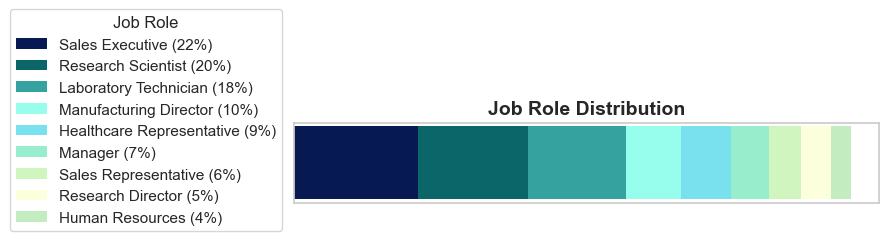

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to generate a stacked horizontal bar plot with colors
def plot_single_horizontal_bar_with_legend(csv_file):
    # Load the dataset
    df = pd.read_csv(csv_file)
    
    # Check if the 'JobRole' column exists
    if 'JobRole' not in df.columns:
        raise ValueError("'JobRole' column not found in the CSV file.")
    
    # Count the occurrences of each JobRole
    jobrole_counts = df['JobRole'].value_counts()
    
    # Normalize the counts to create portions of the bar
    jobrole_ratios = jobrole_counts / jobrole_counts.sum()
    
    # Set colors for each section of the bar (customize these as needed)
    colors = ['#071952','#0B666A','#35A29F','#97FEED','#79E0EE', '#98EECC','#D0F5BE','#FBFFDC','#C3EDC0']
    
    # Set the figure size (increase height for more space below the bar)
    plt.figure(figsize=(10, 2))  # Increased height to 4 for better spacing
    
    # Initialize the left offset for the stacked bar
    left = np.zeros(1)
    
    # Create a horizontal stacked bar plot
    for i, (role, ratio) in enumerate(jobrole_ratios.items()):
        plt.barh(0, ratio, left=left, color=colors[i % len(colors)], edgecolor='none', label=f'{role} ({ratio*100:.0f}%)')
        left += ratio  # Update the left position for the next job role
    
    # Add title and remove unnecessary axis ticks
    plt.title('Job Role Distribution', fontweight='bold' ,fontsize=14)
    plt.yticks([])  # Hide the y-axis since it's not necessary
    plt.xticks([])  # Hide x-axis labels for a clean look
    
    # Add the legend to indicate each job role, moving it further below the bar
    plt.legend(loc='lower left', bbox_to_anchor=(-0.5, -0.45), title='Job Role')  # Moved further down
    
    # Show the plot
    plt.tight_layout()
    plt.savefig(r'C:\Users\KISHAN\Desktop\Group project\Groupproject\StaffSphere---Employee-Management-System\react-side\public\09Job_Role_Distribution.png', bbox_inches='tight')
    plt.show()

# Example usage:
csv_file = '/path/to/IBMEmployee_data.csv'  # Replace with the actual file path
plot_single_horizontal_bar_with_legend('IBMEmployee_data.csv')


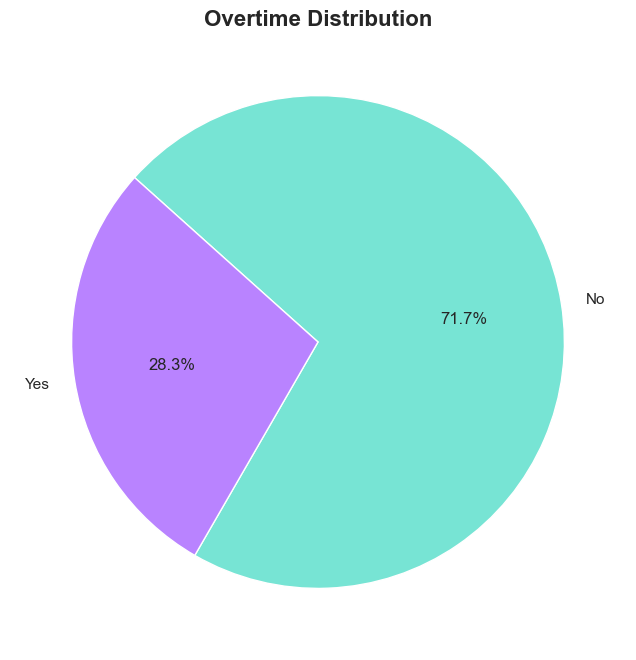

In [58]:
def chart_7():
        plt.figure(figsize=(8, 8))
        
        # Calculate the distribution of 'OverTime'
        overtime_counts = data['OverTime'].value_counts()
        
        # Create a pie chart
        plt.pie(overtime_counts, labels=overtime_counts.index, autopct='%1.1f%%', colors=dark_palette4, startangle=240)
        
        plt.title('Overtime Distribution', fontweight='bold', fontsize=16)
        
        # Save the plot
        plt.savefig(r'C:\Users\KISHAN\Desktop\Group project\Groupproject\StaffSphere---Employee-Management-System\react-side\public\chart_overtime_distribution_pie.png', bbox_inches='tight')
        plt.show()
chart_7()

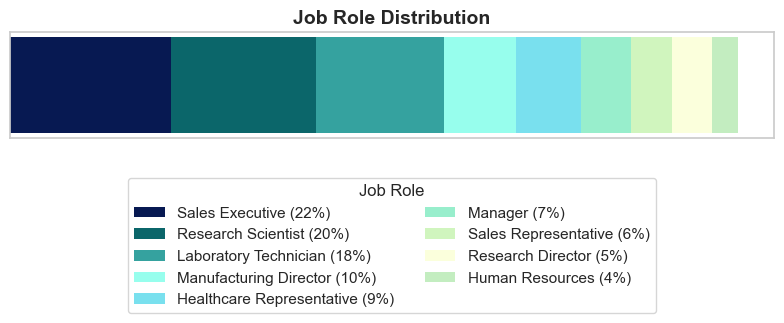

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Function to generate a stacked horizontal bar plot with colors
def plot_single_horizontal_bar_with_legend(csv_file):
    # Load the dataset
    df = pd.read_csv(csv_file)
    
    # Check if the 'JobRole' column exists
    if 'JobRole' not in df.columns:
        raise ValueError("'JobRole' column not found in the CSV file.")
    
    # Count the occurrences of each JobRole
    jobrole_counts = df['JobRole'].value_counts()
    
    # Normalize the counts to create portions of the bar
    jobrole_ratios = jobrole_counts / jobrole_counts.sum()
    
    # Set colors for each section of the bar (customize these as needed)
    colors = ['#071952','#0B666A','#35A29F','#97FEED','#79E0EE', '#98EECC','#D0F5BE','#FBFFDC','#C3EDC0']
    
    # Set the figure size (increase height for more space below the bar)
    plt.figure(figsize=(8, 4))  # Increased height for better spacing
    
    # Initialize the left offset for the stacked bar
    left = np.zeros(1)
    
    # Create a horizontal stacked bar plot
    for i, (role, ratio) in enumerate(jobrole_ratios.items()):
        plt.barh(0, ratio, left=left, color=colors[i % len(colors)], edgecolor='none', label=f'{role} ({ratio*100:.0f}%)')
        left += ratio  # Update the left position for the next job role
    
    # Add title and remove unnecessary axis ticks
    plt.title('Job Role Distribution', fontweight='bold' ,fontsize=14)
    plt.yticks([])  # Hide the y-axis since it's not necessary
    plt.xticks([])  # Hide x-axis labels for a clean look
    
    # Add the legend to indicate each job role, positioning it below the plot
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), title='Job Role', ncol=2)  # Adjust ncol for legend columns
    
    # Show the plot
    plt.tight_layout()
    plt.savefig(r'C:\Users\KISHAN\Desktop\Group project\Groupproject\StaffSphere---Employee-Management-System\react-side\public\09Job_Role_Distribution.png', bbox_inches='tight')
    plt.show()

# Example usage:
csv_file = 'IBMEmployee_data.csv'  # Replace with the actual file path
plot_single_horizontal_bar_with_legend(csv_file)
